# **Messy IPYNB File**

## Importing libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy import stats
from shapely.geometry import Point, Polygon
import numpy as np
import contextily as cx

In [2]:
bird_health_df = pd.read_excel("data/birds.xlsx",sheet_name="Capture and Health")
bird_vhf_df = pd.read_excel('data/birds.xlsx',sheet_name="VHF Telemetry")
bird_sat_df = pd.read_excel('data/birds.xlsx',sheet_name="Satellite Telemetry")
bird_amoy_df = pd.read_excel('data/birds.xlsx',sheet_name="AMOY Survey")

In [3]:
bird_health_df.head()

,Data Publication Date,Data Publication Reference,Study Reference Number,Study Name,Capture ID,Bird Code,Common Name,Scientific Name,FWS Band,Color Band,...,Blood Feather Comments,Release Health ID,Release Breathing,Release Attitude,Release Comments,NA Health ID,NA Breathing,NA Attitude,NA Comments,Field Data Verification Status
0,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",13,AMOY-012,American Oystercatcher,Haematopus palliatus,1106-16404,CMR(C5),...,NaN,6435.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
1,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",14,AMOY-013,American Oystercatcher,Haematopus palliatus,1106-16312,MR(C0),...,NaN,6440.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
2,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",15,AMOY-014,American Oystercatcher,Haematopus palliatus,1106-16313,MR(F0),...,NaN,6445.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
3,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",16,AMOY-015,American Oystercatcher,Haematopus palliatus,1106-16311,MR (E2),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Underway
4,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",17,AMOY-016,American Oystercatcher,Haematopus palliatus,1106-16314,MR(H1),...,NaN,6468.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway


Note - For bird health data, I want to try geo plotting with longitude and lattitudes with amount of oil.
could i do machine learning?? predictions?

In [4]:
#isolating a df of just lat, long, and yes to visual oiling
birdOil = bird_health_df[['Capture Latitude', 'Capture Longitude', 'Visual Oiling']]
print(birdOil.head())
birdOil['Visual Oiling'].unique()

   Capture Latitude  Capture Longitude  \
0          29.08955          -90.84030   
1          29.05656          -90.86454   
2          29.05656          -90.86454   
3          29.05656          -90.86454   
4          29.11760          -90.86320   

                                       Visual Oiling  
0  Trace amounts of oil detected on bird by visua...  
1  Trace amounts of oil detected on bird by visua...  
2  Trace amounts of oil detected on bird by visua...  
3  Trace amounts of oil detected on bird by visua...  
4  Trace amounts of oil detected on bird by visua...  


array(['Trace amounts of oil detected on bird by visual evaluation.',
       'No oil detected on bird by visual evaluation.',
       'Not assessment of oil on bird by visual evaluation.',
       'Light amounts of oil detected on bird by visual evaluation.',
       'Heavy amounts of oil  detected on bird by visual evaluation.',
       'Moderate amounts of oil detected on bird by visual evaluation.'],
      dtype=object)

In [5]:
#cleaning data to remove no assesment and turning it into better strings
birdOil = birdOil[birdOil['Visual Oiling'] != 'Not assessment of oil on bird by visual evaluation.']
birdOil = birdOil[birdOil['Visual Oiling'] != 'No oil detected on bird by visual evaluation.']
print(birdOil['Visual Oiling'].unique())
#making strings shorter
birdOil['Visual Oiling'] = birdOil['Visual Oiling'].apply(lambda x: x.split(' ')[0])
print(birdOil['Visual Oiling'].unique())
birdOil.rename(columns={'Visual Oiling':'oiling', 'Capture Latitude': 'latitude', 'Capture Longitude':'longitude'},inplace=True)

['Trace amounts of oil detected on bird by visual evaluation.'
 'Light amounts of oil detected on bird by visual evaluation.'
 'Heavy amounts of oil  detected on bird by visual evaluation.'
 'Moderate amounts of oil detected on bird by visual evaluation.']
['Trace' 'Light' 'Heavy' 'Moderate']


   latitude  longitude oiling
0  29.08955  -90.84030  Trace
1  29.05656  -90.86454  Trace
2  29.05656  -90.86454  Trace
3  29.05656  -90.86454  Trace
4  29.11760  -90.86320  Trace


<AxesSubplot:>

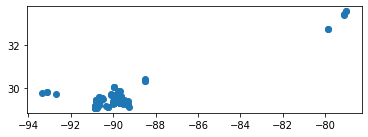

In [6]:
print(birdOil.head())
geodf = gpd.GeoDataFrame(birdOil,geometry=gpd.points_from_xy(birdOil.longitude,birdOil.latitude))
geodf.head()
geodf.plot()

   FID          Program State_Code  State_Name Flowing_St  FID_1  \
0    1  PERMIT TRACKING         AL     ALABAMA          F    919   
1    2             None         AK      ALASKA          N    920   
2    3          AZURITE         AZ     ARIZONA          F    921   
3    4              PDS         AR    ARKANSAS          F    922   
4    5             None         CA  CALIFORNIA          N    923   

                                            geometry  
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...  
1  MULTIPOLYGON (((-161.33379 58.73325, -161.3824...  
2  POLYGON ((-114.52063 33.02771, -114.55909 33.0...  
3  POLYGON ((-94.46169 34.19677, -94.45262 34.508...  
4  MULTIPOLYGON (((-121.66522 38.16929, -121.7823...  


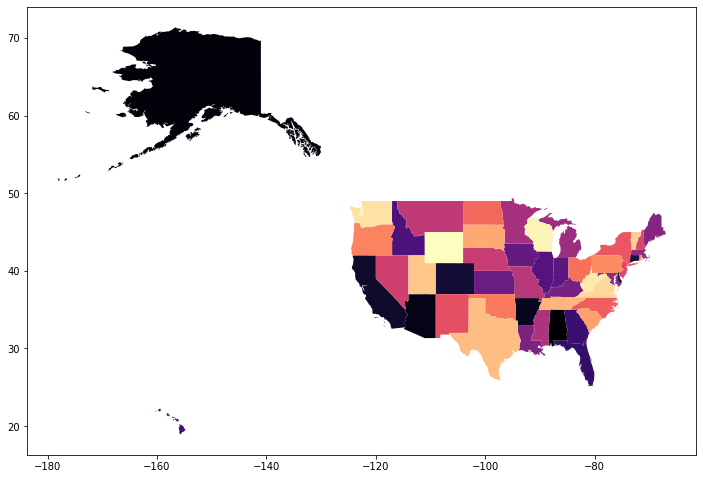

In [7]:
## Geoplotting where birds were found oiled in some capacity compared to explosion location
states = gpd.read_file('data/maps/States_shapefile.shp')
print(states.head())
states.plot(cmap='magma', figsize=(12,12))
southeast = states[states['State_Code'].isin(['FL','GA','AL','SC','NC', 'TN', 'LA', 'MS', 'VA'])]

Trace       158
Light        17
Heavy         1
Moderate      1
Name: oiling, dtype: int64


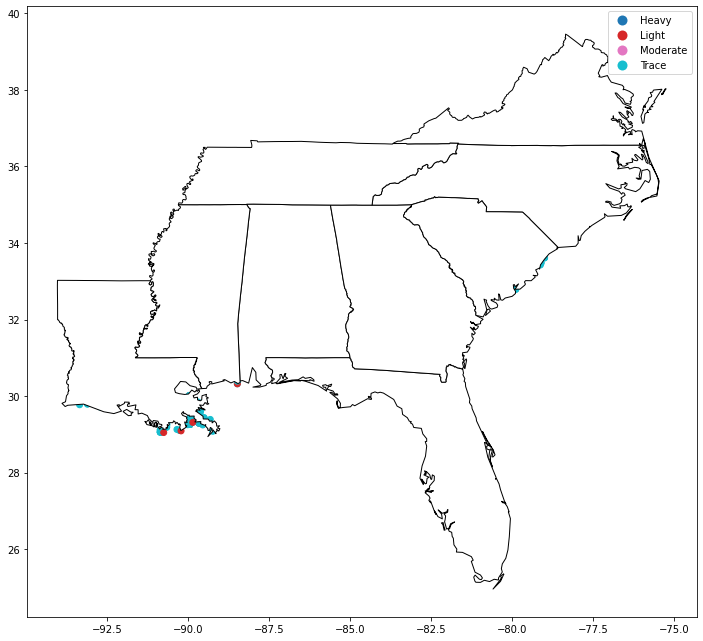

In [8]:
print(geodf['oiling'].value_counts())
ax = geodf.plot(column='oiling',legend=True,figsize=(12,12))
base = southeast.plot(ax=ax,color = 'white',edgecolor='black',figsize=(12,12),legend=True)

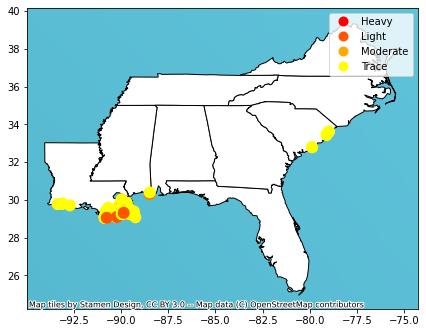

In [9]:
ax = southeast.plot(color = 'white',edgecolor='black',figsize=(7,7),legend=True)
geodf.plot(ax=ax,column='oiling',legend=True,figsize=(10,10),marker='o',linewidth=6,cmap='autumn')
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=12)

In [ ]:
#let's compare whether birds showed visible oiling if site was oiled 
#grouped bar chart - site oiled, vs not oiled; two bars in each one for # of visual, one for # fluores


siteEffects =  bird_health_df[['Site Oiling', 'Visual Oiling', 'Fluorescence Assessment']]
print(siteEffects['Visual Oiling'].unique())
#siteEffects = siteEffects[siteEffects['Visual Oiling'] != 'Not assessment of oil on bird by visual evaluation.']
#siteEffects = siteEffects[siteEffects['Visual Oiling'] != 'No oil detected on bird by visual evaluation.']
print(siteEffects['Visual Oiling'].unique())
#siteEffects = siteEffects[siteEffects['Fluorescence Assessment'] != 'No assessment of oil on bird by UV fluorescence evaluation.']
#siteEffects = siteEffects[siteEffects['Fluorescence Assessment'] != 'No oil detected on bird by UV fluorescence evaluation.']
print(siteEffects['Visual Oiling'].unique())
siteEffects['Visual Oiling'] = siteEffects['Visual Oiling'].apply(lambda x: x.split(' ')[0])
siteEffects['Fluorescence Assessment'] = siteEffects['Fluorescence Assessment'].apply(lambda x: x.split(' ')[0])


siteEffects.head()
siteEffects['Visual Oiling'].unique()

In [343]:
siteEffects['Site Oiling'].unique()
siteEffects = siteEffects[siteEffects['Site Oiling'] != 'No recorded assessment of oiling at site.']
siteEffects['Site Oiling'] = siteEffects['Site Oiling'].apply(lambda x: x.split(' ')[0])
#siteEffects.loc[(siteEffects['Site Oiling'] =='Oiling')] = 'Yes'
siteEffects.head(5)
siteEffects['Visual Oiling'].unique()

array(['Trace', 'No', 'Not', 'Light', 'Heavy', 'Moderate'], dtype=object)

In [344]:
#Numbering oiling and flurescence
noAssesVis = (siteEffects['Visual Oiling'] == 'Not').sum()
noAssesFluor = (siteEffects['Fluorescence Assessment'] == 'Not').sum()

oilNums = {'No':0.0, 'Not':0.0, 'Trace':1.0, 'Light':1.0, 'Moderate':1.0,'Heavy':1.0}
siteCheck = {'Oiling':'Yes', 'No': 'No'}
siteEffects.rename(columns={'Visual Oiling':'visual', 'Fluorescence Assessment': 'fluorescence','Site Oiling':'site'},inplace=True)
print(siteEffects['visual'].unique())
siteEffects.visual = [oilNums[item] for item in siteEffects.visual]
siteEffects.fluorescence = [oilNums[item] for item in siteEffects.fluorescence]
siteEffects.site = [siteCheck[item] for item in siteEffects.site]
countVis = siteEffects['visual'].count()
countFluor =siteEffects['fluorescence'].count()
siteEffects.head()

['Trace' 'No' 'Not' 'Light' 'Heavy' 'Moderate']


,site,visual,fluorescence
0,No,1.0,0.0
1,No,1.0,0.0
2,No,1.0,0.0
4,No,1.0,0.0
5,No,1.0,0.0


In [345]:
#visualCount = siteEffects.visual.value_counts()
#sumVisual = siteEffects.visual.sum()
#fluorCount = siteEffects.fluorescence.value_counts()
#print(siteEffects.visual.unique())
#print("vis count;" + str(visualCount))
#print("sum;" + str(sumVisual))
#print("f count;" +str(fluorCount))
siteEffects = siteEffects.groupby('site').agg({'visual':'sum','fluorescence':'sum'})
print(noAssesVis)
print(countVis)
print(noAssesFluor)
print(countFluor)

siteEffects['visual'] = siteEffects['visual'].apply(lambda x: (x/(countVis - noAssesVis) * 100))
siteEffects['fluorescence']= siteEffects['fluorescence'].apply(lambda x: (x/(countFluor - noAssesFluor) * 100))
#siteEffects['visual_oil_percent'] = (siteEffects['visual'] / siteEffects['visual'].value_counts() - noAssesVis) * 100
#siteEffects['fluorescent_oil_percent'] = (siteEffects['fluorescence'] / siteEffects['fluorescence'].value_counts() - noAssesFluor) * 100

#effects= siteEffects[['visual_oil_percent','fluorescent_oil_percent']]
siteEffects.head()
#Let's create a grouped bar chart of this


#plt.title("Number of Birds Observed with Oiling under Visual and UV Observation")
#sns.catplot(data=siteEffects, kind="bar", x="Site Oiling", hue='Site Oiling')


11
843
0
843


,visual,fluorescence
site,,
No,15.504808,22.775801
Yes,5.168269,18.742586


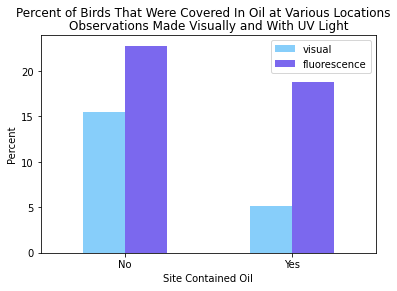

In [361]:
siteEffects.plot.bar(rot=0,color={'visual':'lightskyblue','fluorescence':'mediumslateblue'})
plt.suptitle("Percent of Birds That Were Covered In Oil at Various Locations")
plt.title("Observations Made Visually and With UV Light")
plt.xlabel("Site Contained Oil")
plt.ylabel("Percent")
plt.show()

## Oil Content of Sand Data

In [23]:
oil_sand_df = pd.read_excel('data/oil-sand.xlsx',sheet_name="data")
oil_sand_df.tail() ## need to drop last 4 rows
oil_sand_df.drop(oil_sand_df.tail(4).index,inplace = True) ## need to drop last 4 rows
oil_sand_df.tail() 

,Sample Number,Collection Date,Sample ID,Sampling Location,Latitude,Longitude,Processing Lab,Fractional Oil Content,Fractional Moisture Content
560,561,6/24/2014,062414-41,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1040,ND
561,562,6/24/2014,062414-42,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1959,ND
562,563,6/24/2014,062414-43,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1589,ND
563,564,6/24/2014,062414-44,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1091,ND
564,565,6/24/2014,062414-45,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1368,ND


In [24]:
oil_sand_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample Number                565 non-null    object 
 1   Collection Date              565 non-null    object 
 2   Sample ID                    565 non-null    object 
 3   Sampling Location            565 non-null    object 
 4   Latitude                     565 non-null    float64
 5   Longitude                    565 non-null    float64
 6   Processing Lab               565 non-null    object 
 7   Fractional Oil Content       565 non-null    float64
 8   Fractional Moisture Content  565 non-null    object 
dtypes: float64(3), object(6)
memory usage: 44.1+ KB


In [25]:
#IDEA - map points of oil content in sand with different colors on a scale
# oil content over time on certain islands in florida
#representing more or less fractional oil conted

In [26]:
## Let's look at unique sampling locations
oil_sand_df['Sampling Location'].unique()

array(['Dauphin Island, AL', 'Perdido Key, FL', 'Gulf Shores, AL',
       'Fort Morgan, AL', 'Gulfport, MS', "Elmer's Island, LA",
       'Fort Pickens, FL', 'Horn Island, MS', 'West Ship Island, MS',
       'East Ship Island, MS', 'Gulf State Park, AL',
       'Pass Christian, MS', 'Grand Isle, LA', 'Waveland, MS',
       'Pensacola Beach, FL', 'Port Fourchon, LA'], dtype=object)

In [27]:
#change location to just state name and let's plot the oil content over time 
oil_areas_df = oil_sand_df
oil_areas_df['Sampling Location'] = oil_sand_df['Sampling Location'].apply(lambda x: x.split(',')[1].strip())
oil_areas_df.head()

,Sample Number,Collection Date,Sample ID,Sampling Location,Latitude,Longitude,Processing Lab,Fractional Oil Content,Fractional Moisture Content
0,1,4/3/2011,040311-11,AL,30.242830,-88.122680,Reddya,0.174400,ND
1,2,7/17/2011,071711-03,FL,30.308542,-87.371185,Aepplib,0.129956,0.003369
2,3,7/17/2011,071711-04,FL,30.308542,-87.371185,Aeppli,0.182391,0.013961
3,4,7/17/2011,071711-05,FL,30.308542,-87.371185,Aeppli,0.148263,0.004093
4,5,7/17/2011,071711-06,FL,30.308542,-87.371185,Aeppli,0.313752,0.031155


        Latitude  Longitude  Fractional Oil Content
count  86.000000  86.000000               86.000000
mean   30.314424 -87.313948                0.134157
std     0.007628   0.074685                0.065824
min    30.308542 -87.371185                0.011300
25%    30.308542 -87.371185                0.098225
50%    30.308542 -87.371185                0.135000
75%    30.318102 -87.278755                0.166625
max    30.333534 -87.125605                0.445600


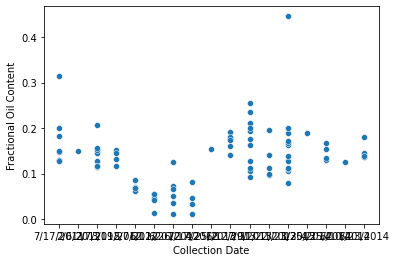

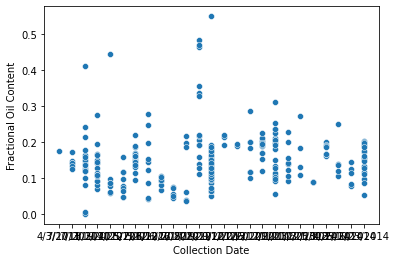

In [28]:
#Let's look at just florida locations and fractional oil content over time
floridaOil = oil_areas_df[oil_areas_df['Sampling Location'] == 'FL']
print(floridaOil.describe())
sns.scatterplot(data=floridaOil, x='Collection Date', y= 'Fractional Oil Content')
plt.show()

alabamaOil = oil_areas_df[oil_areas_df['Sampling Location'] =='AL']
sns.scatterplot(data=alabamaOil, x='Collection Date', y= 'Fractional Oil Content')
plt.show()


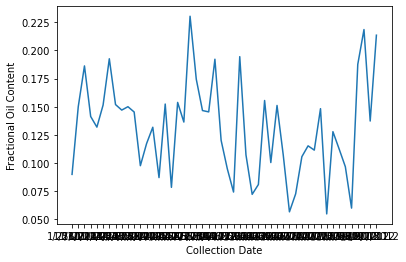

In [29]:
# let's look at average oil content over time
avgOil =oil_areas_df.groupby(['Collection Date']).median()
sns.lineplot(data=avgOil, x='Collection Date', y='Fractional Oil Content')
plt.show()

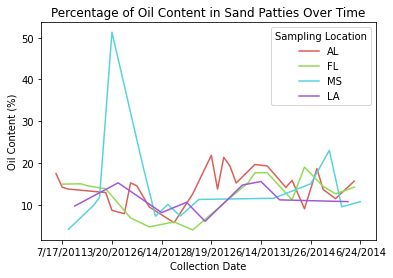

In [30]:
#oil_areas_df['Fractional Oil Content'] = oil_sand_df['Fractional Oil Content'].apply(lambda x: '%.3f' % x)
oil_areas_df['Fractional Oil Content'] = oil_sand_df['Fractional Oil Content'].apply(lambda x: x * 100)
ax = sns.lineplot(data=oil_areas_df, x='Collection Date', y='Fractional Oil Content', hue='Sampling Location',estimator=np.median,ci=None,palette="hls")
plt.title('Percentage of Oil Content in Sand Patties Over Time')
plt.ylabel("Oil Content (%)")
plt.rcParams["figure.figsize"] = (20,10)
xticks = ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 8 == 1:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)
plt.show()


In [31]:
##Let's run a Kendall Tau to see the strength of the correlation measure between time and oil content in the sand:

tau, p_value = stats.kendalltau(oil_areas_df['Collection Date'], oil_areas_df['Fractional Oil Content'])
print(tau)
print(p_value)



-0.020474638467950508
0.47474220858787564


This tau value indicates that there is basically no monotonous relationship at all between time and fractional oil content

## Gulf Fisheries Data

In [22]:
commercial_df = pd.read_excel('data/gulf-fisheries.xlsx',sheet_name="Commercial Fisheries")
commercial_shrimp_df = pd.read_excel('data/gulf-fisheries.xlsx',sheet_name="Commercial Shrimp Fishery")
recreational_df = pd.read_excel('data/gulf-fisheries.xlsx',sheet_name="Recreational Fisheries")
mariculture_df = pd.read_excel('data/gulf-fisheries.xlsx',sheet_name="Mariculture Fisheries")

In [23]:
commercial_df.head()

,year,state/region,com.revenue,com.landings,com.licenses,com.revenue.percapita,Unnamed: 6,Unnamed: 7
0,2000,AL,6.407539e+07,1.384834e+07,3070,20871.461238,NaN,NaN
1,2001,AL,4.321251e+07,1.172914e+07,3056,14140.217856,NaN,NaN
2,2002,AL,3.421474e+07,1.073109e+07,3068,11152.132303,NaN,NaN
3,2003,AL,3.411471e+07,1.158246e+07,2770,12315.780185,NaN,NaN
4,2004,AL,3.366891e+07,1.204682e+07,2748,12252.149332,NaN,NaN


In [24]:
commercial_df.tail()

,year,state/region,com.revenue,com.landings,com.licenses,com.revenue.percapita,Unnamed: 6,Unnamed: 7
103,2013,GOM,6.923216e+08,6.106454e+08,82870,8354.309159,NaN,NaN
104,2014,GOM,7.624289e+08,5.648584e+08,84056,9070.487361,NaN,NaN
105,2015,GOM,6.360567e+08,7.045396e+08,84239,7550.620698,NaN,NaN
106,2016,GOM,6.464626e+08,7.869374e+08,79520,8129.559913,NaN,NaN
107,2017,GOM,6.182598e+08,6.360182e+08,66427,9307.356446,NaN,NaN


In [25]:
#Cleaning data

#dropping the unnamed columns
commercial_df.drop(['Unnamed: 6','Unnamed: 7'],axis=1,inplace=True)
commercial_df.head()

,year,state/region,com.revenue,com.landings,com.licenses,com.revenue.percapita
0,2000,AL,6.407539e+07,1.384834e+07,3070,20871.461238
1,2001,AL,4.321251e+07,1.172914e+07,3056,14140.217856
2,2002,AL,3.421474e+07,1.073109e+07,3068,11152.132303
3,2003,AL,3.411471e+07,1.158246e+07,2770,12315.780185
4,2004,AL,3.366891e+07,1.204682e+07,2748,12252.149332


In [26]:
##changing column names
commercial_df.rename(columns={'state/region':'region','com.revenue':'revenue','com.landings':'landings','com.licenses':'licenses','com.revenue.percapita':'revenue.percapita'},inplace=True)
commercial_df.head(1)

,year,region,revenue,landings,licenses,revenue.percapita
0,2000,AL,64075386.0,1.384834e+07,3070,20871.461238


In [27]:
commercial_df['licenses'].unique()

array([3070, 3056, 3068, 2770, 2748, 2479, 2375, 2498, 2472, 2438, 3413,
       3583, 3008, 2615, 2347, 2135, 1997, 1958, 15241, 14705, 13674,
       13445, 12901, 12500, 11578, 11219, 11483, 11418, 11735, 12636,
       12768, 12679, 12678, 12608, 12425, 11902, 92243, 96126, 90318,
       85606, 79629, 65491, 68315, 65889, 62889, 67581, 73057, 74570,
       71385, 59881, 61677, 62505, 58084, 45459, 'n/d', 2288, 2150, 1908,
       1656, 1653, 1672, 6814, 6148, 5715, 5650, 5599, 5400, 5294, 5185,
       5069, 5075, 5161, 110861, 114188, 107367, 102097, 95543, 80793,
       82500, 86631, 83228, 87371, 94071, 96692, 95123, 82870, 84056,
       84239, 79520, 66427], dtype=object)

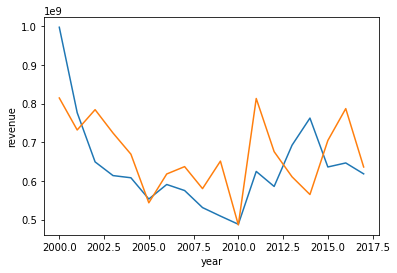

In [43]:
## Let's look @ revenue, landings, and licenses over time in 3 different charts from the GOM region in general

gulfRevenue = commercial_df.loc[commercial_df['region'] =='GOM']
sns.lineplot(data=gulfRevenue,x='year',y='revenue')

sns.lineplot(data=gulfRevenue,x='year',y='landings')
#sns.lineplot(data=gulfRevenue,x='year',y='licenses')
#sns.lineplot(data=gulfRevenue,x='year',y='revenue.percapita')
plt.show()

#lic = commercial_df.drop(commercial_df.index[commercial_df['licenses'] == 'n/d'])
#pd.to_numeric(lic['licenses'])
#sns.lineplot(data=lic,x='year',y='licenses',hue='region')
#plt.show()
#sns.lineplot(data=commercial_df,x='year',y='revenue.percapita',hue='region')
#plt.show()

## Louisiana Fisheries data - trying out new dataset instead of gulf fisheries one

In [105]:
la_fisheries = pd.read_csv('data/louisiana-fisheries.csv')
la_fisheries.head()

,Year,Type,Location,Landings in lb,Dollar Value,Number of Trips
0,2002,BLUE CRAB,ATCHAFALAYA/VERMILION-TECH BASIN,"8,588,267",4926654.0,"21,052"
1,2002,BLUE CRAB,BARATARIA BASIN,"10,632,773",6436316.0,"28,039"
2,2002,BLUE CRAB,CALCASIEU RIVER BASIN,"1,347,868",951112.0,"5,580"
3,2002,BLUE CRAB,LAKE PONTCHARTRAIN BASIN,"10,154,470",7166878.0,"24,777"
4,2002,BLUE CRAB,LOUISIANA GRID 13,"10,709",8564.0,36


In [106]:
la_fisheries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             504 non-null    int64  
 1   Type             504 non-null    object 
 2   Location         504 non-null    object 
 3   Landings in lb   487 non-null    object 
 4   Dollar Value     472 non-null    float64
 5   Number of Trips  469 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.8+ KB


In [107]:
la_fisheries = la_fisheries.dropna()
la_fisheries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 503
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             469 non-null    int64  
 1   Type             469 non-null    object 
 2   Location         469 non-null    object 
 3   Landings in lb   469 non-null    object 
 4   Dollar Value     469 non-null    float64
 5   Number of Trips  469 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 25.6+ KB


In [108]:
la_fisheries['Type'] = la_fisheries['Type'].str.lower()
la_fisheries.head()

,Year,Type,Location,Landings in lb,Dollar Value,Number of Trips
0,2002,blue crab,ATCHAFALAYA/VERMILION-TECH BASIN,"8,588,267",4926654.0,"21,052"
1,2002,blue crab,BARATARIA BASIN,"10,632,773",6436316.0,"28,039"
2,2002,blue crab,CALCASIEU RIVER BASIN,"1,347,868",951112.0,"5,580"
3,2002,blue crab,LAKE PONTCHARTRAIN BASIN,"10,154,470",7166878.0,"24,777"
4,2002,blue crab,LOUISIANA GRID 13,"10,709",8564.0,36


In [109]:
la_fisheries.rename(columns={'Landings in lb':'Landings(lbs)','Dollar Value':'Value($)','Number of Trips':'Trips'},inplace=True)
la_fisheries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 503
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           469 non-null    int64  
 1   Type           469 non-null    object 
 2   Location       469 non-null    object 
 3   Landings(lbs)  469 non-null    object 
 4   Value($)       469 non-null    float64
 5   Trips          469 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 25.6+ KB


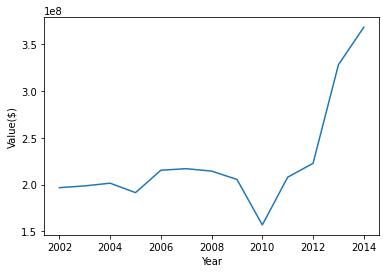

In [110]:
## total value of all seafood per year
seafoodValue = la_fisheries.groupby('Year').agg({'Value($)':'sum','Landings(lbs)':'sum'})
seafoodValue.head()

sns.lineplot(data=seafoodValue,x='Year',y='Value($)')
plt.show()

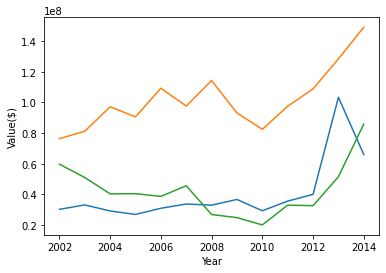

In [111]:
#value of different seafoods through years:
crab = la_fisheries.loc[la_fisheries['Type']=='blue crab']
crab = crab.groupby('Year').agg({'Value($)':'sum','Landings(lbs)':'sum'})

oyster = la_fisheries.loc[la_fisheries['Type']=='oyster']
oyster = oyster.groupby('Year').agg({'Value($)':'sum','Landings(lbs)':'sum'})

white_shrimp = la_fisheries.loc[la_fisheries['Type']=='white shrimp']
white_shrimp = white_shrimp.groupby('Year').agg({'Value($)':'sum','Landings(lbs)':'sum'})

brown_shrimp = la_fisheries.loc[la_fisheries['Type']=='brown shrimp']
brown_shrimp = brown_shrimp.groupby('Year').agg({'Value($)':'sum','Landings(lbs)':'sum'})

sns.lineplot(data=crab,x='Year',y='Value($)',palette="hls")
sns.lineplot(data=oyster,x='Year',y='Value($)',palette="hls")
sns.lineplot(data=white_shrimp,x='Year',y='Value($)',palette="hls")
sns.lineplot(data=brown_shrimp,x='Year',y='Value($)',palette="hls")

plt.show()

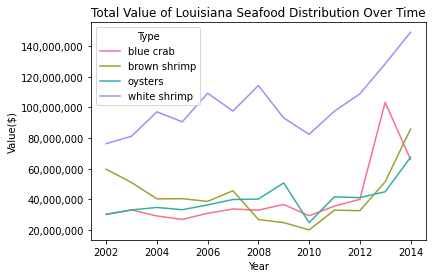

In [112]:
seafood = la_fisheries.groupby(['Year','Type']).agg({'Value($)':'sum','Landings(lbs)':'sum'})

ax = sns.lineplot(data=seafood,x='Year',y='Value($)',hue='Type',palette="husl")
plt.title("Total Value of Louisiana Seafood Distribution Over Time")
plt.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

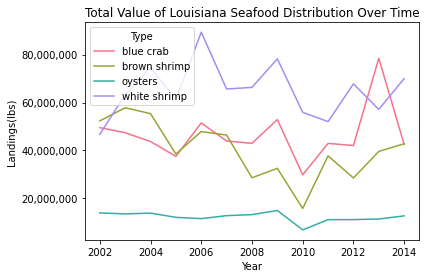

## Fish Data

In [4]:
fish_df = pd.read_excel('data/fish.xlsx',sheet_name="Sheet1", header=2) #need to get in headers for columns when reading in data

In [5]:
fish_df.head()

,Sample,Species,d15N,d13C,d34S,%N,%C,C:N,MeHg,Ihg,...,SD.6,D201,SD.7,D204,SD.8,D199:D201,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,sample ID,fish type,NaN,NaN,NaN,NaN,NaN,NaN,ppb,ppb,...,NaN,0/00,NaN,0/00,NaN,ratioMercury in the marine environment poses e...,NaN,NaN,NaN,NaN
1,DC-12-102,Amberjack,15.470000,-16.690000,18.70,46.200000,13.500000,3.422222,3477,6,...,0.108163,1.276656,0.200675,-0.083326,0.106676,1.215708,NaN,NaN,NaN,NaN
2,DC-12-002,Amberjack,14.100000,-17.400000,19.25,47.600000,14.600000,3.260274,6368,383,...,0.108163,0.767604,0.200675,-0.17461,0.106676,1.291591,NaN,NaN,NaN,NaN
3,DC-12-099,Amberjack,12.800000,-16.900000,17.55,44.800000,14.300000,3.132867,4833,117,...,0.108163,0.60069,0.200675,-0.034849,0.106676,1.262907,NaN,NaN,NaN,NaN
4,DC-12-100,amberjack,12.829524,-16.966473,19.55,46.487228,13.620681,3.412989,2996.577762,69.255159,...,0.031484,1.23834,0.084361,-0.075762,0.094587,1.199252,NaN,NaN,NaN,NaN


In [6]:
fish_df.drop(fish_df.head(1).index,inplace = True) #removing column description row
fish_df.drop(list(fish_df.filter(regex = 'Unnamed')), axis = 1, inplace = True)

In [7]:
fish_df.head()

,Sample,Species,d15N,d13C,d34S,%N,%C,C:N,MeHg,Ihg,...,SD.4,D199,SD.5,D200,SD.6,D201,SD.7,D204,SD.8,D199:D201
1,DC-12-102,Amberjack,15.470000,-16.690000,18.70,46.200000,13.500000,3.422222,3477,6,...,0.508000,1.552042,0.228471,0.005336,0.108163,1.276656,0.200675,-0.083326,0.106676,1.215708
2,DC-12-002,Amberjack,14.100000,-17.400000,19.25,47.600000,14.600000,3.260274,6368,383,...,0.508000,0.99143,0.228471,0.114607,0.108163,0.767604,0.200675,-0.17461,0.106676,1.291591
3,DC-12-099,Amberjack,12.800000,-16.900000,17.55,44.800000,14.300000,3.132867,4833,117,...,0.508000,0.758615,0.228471,0.089405,0.108163,0.60069,0.200675,-0.034849,0.106676,1.262907
4,DC-12-100,amberjack,12.829524,-16.966473,19.55,46.487228,13.620681,3.412989,2996.577762,69.255159,...,0.112423,1.485082,0.063942,0.083009,0.031484,1.23834,0.084361,-0.075762,0.094587,1.199252
5,DC-12-100 dup,amberjack,12.829524,-16.966473,19.55,46.487228,13.620681,3.412989,2628.493393,65.231211,...,0.112423,1.582262,0.063942,0.126591,0.031484,1.298218,0.084361,-0.123816,0.094587,1.218795


In [8]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 1 to 521
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample     521 non-null    object 
 1   Species    521 non-null    object 
 2   d15N       413 non-null    float64
 3   d13C       413 non-null    float64
 4   d34S       330 non-null    float64
 5   %N         405 non-null    float64
 6   %C         405 non-null    float64
 7   C:N        317 non-null    float64
 8   MeHg       507 non-null    object 
 9   Ihg        335 non-null    object 
 10  THg        341 non-null    object 
 11  MeHg.1     339 non-null    object 
 12  Ihg.1      339 non-null    object 
 13  Lat        514 non-null    float64
 14  Lon        514 non-null    float64
 15  d199       99 non-null     object 
 16  SD         101 non-null    object 
 17  d200       101 non-null    object 
 18  SD.1       100 non-null    float64
 19  d201       101 non-null    object 
 20  SD.2      

renaming some column names
the following is supplemental information given by dataset owner:
* ID_Data_sample (sample ID), ID_Species (species common name), delta-15N Nitrogen stable isotope ratio 15N/14N 
          (‰, 'per mil', or parts per thousand), delta-13C Lipid Extracted Carbon stable isotope ratio (‰, 'per mil', 
          or parts per thousand), delta-13C Carbon isotope ratio 13C/12C (‰, 'per mil', or parts per thousand), 
          delta-34S Sulfur isotope ratio 34S/32S (‰, 'per mil', or parts per thousand), %N Nitrogen percent molar mass 
          composition (%), %C Carbon percent molar mass composition (%), C:N Carbon to Nitrogen mass ratio (%), MeHg 
          Methylmercury (ppb), iHg inorganic Mercury (ppb), THg Total Mercury (ppb), Latitude (decimal degrees), 
          Longitude (decimal degrees), two sets of d199 (0/00) thru d204 (0/00) and Standard Deviations. Common Name 
          of Species [Amberjack, Pinfish, King Snake Eel, Moray Eel, Cutthroat Eel, Rock Sea bass, Vermillion Snapper, 
          Snowy Grouper, Gag Grouper, Red Snapper, Red Porgy, Cubbyu, Almaco jack, Longspine Porgy, Warsaw Grouper, 
          Yellow-Edge Grouper, Scamp, Grey Triggerfish, Whitebone Porgy, Grey Snapper, Inshore Lizard Fish, Hermit 
          Crab, Bank Sea Bass, Tomtate, Black Sea Bass, Shrimp]|||||

In [9]:
print(fish_df['Species'].unique()) # checking how many categories

['Amberjack' 'amberjack' 'almaco jack' 'PINFISH' 'King Snake Eel'
 'Moray Eel' 'Cutthroat Eel' 'rock seabass' 'vermillion snapper'
 'longspine porgy' 'red snapper' 'pinfish' 'snowy grouper' 'Snowy grouper'
 'gag grouper' 'Red porgy' 'red porgy' 'rock sea bass' 'cubbyu'
 'bank sea bass' 'warsaw grouper' 'yellow-edge grouper' 'amberjack liver'
 'eel liver' 'grouper' 'Pinfish' 'Pigfish' 'Grey snapper' 'Red grouper'
 'Scamp' 'Red snapper' 'Grey Triggerfish' 'Albaco Jack' 'Whitebone porgy'
 'Inshore lizard fish' 'Vermillion snapper' 'Hermit Crab' 'Bank seabass'
 'Tomtate' 'Hermit crab' 'grey snapper' 'whitebone porgy' 'bank seabass'
 'black sea bass' 'pigfish' 'shrimp']


In [10]:
## in my analysis, I'll be using the MeHg ppb values, but since FDA considers levels in ppm, I'll convert that column 
#to ppm for ease of analysis
fish_df['Species'] = fish_df['Species'].str.lower()
## fixing some issues with fish names
## These are correct names: Amberjack, Pinfish, King Snake Eel, Moray Eel, Cutthroat Eel, Rock Sea bass, Vermillion Snapper, 
         # Snowy Grouper, Gag Grouper, Red Snapper, Red Porgy, Cubbyu, Almaco jack, Longspine Porgy, Warsaw Grouper, 
          #Yellow-Edge Grouper, Scamp, Grey Triggerfish, Whitebone Porgy, Grey Snapper, Inshore Lizard Fish, Hermit 
         # Crab, Bank Sea Bass, Tomtate, Black Sea Bass, Shrimp
            
updateFish = {'rock seabass':'rock sea bass','bank seabass':'bank sea bass','albaco jack':'almaco jack','amberjack liver':'amberjack','pigfish':'pinfish'}

fish_df.update(fish_df['Species'].replace(updateFish))
fish_df = fish_df[fish_df.Species != 'grouper']
fish_df = fish_df[fish_df.Species != 'eel liver']
fish_df = fish_df[fish_df.Species != 'red grouper']
print(fish_df['Species'].unique())

mercury = fish_df[['Species','MeHg']]
#mercury['Species'] = mercury['Species'].str.lower()
mercury = mercury.dropna()
mercury.head()

['amberjack' 'almaco jack' 'pinfish' 'king snake eel' 'moray eel'
 'cutthroat eel' 'rock sea bass' 'vermillion snapper' 'longspine porgy'
 'red snapper' 'snowy grouper' 'gag grouper' 'red porgy' 'cubbyu'
 'bank sea bass' 'warsaw grouper' 'yellow-edge grouper' 'grey snapper'
 'scamp' 'grey triggerfish' 'whitebone porgy' 'inshore lizard fish'
 'hermit crab' 'tomtate' 'black sea bass' 'shrimp']


,Species,MeHg
1,amberjack,3477
2,amberjack,6368
3,amberjack,4833
4,amberjack,2996.577762
5,amberjack,2628.493393


In [11]:
# now to make it ppm
mercury['MeHg'] = mercury['MeHg'].apply(lambda x: round(x/1000,2))
mercury.head()

,Species,MeHg
1,amberjack,3.48
2,amberjack,6.37
3,amberjack,4.83
4,amberjack,3.00
5,amberjack,2.63


In [12]:
#Let's determine if distribution is normal using Shapiro WIlks test

test_statistic, p_value = stats.shapiro(mercury['MeHg'])
if p_value < 0.05:
    print("Since the pvalue is less than 0.05, we reject the null hypothesis that the MeHg levels are normally distributed.\n")
else:
    print("Since the pvalue is greater than 0.05, we accept the null hypothesis that the MeHg levels are normally distributed.\n")

Since the pvalue is less than 0.05, we reject the null hypothesis that the MeHg levels are normally distributed.



Based on this test, we know that the distribution is NOT normal, which means we can't use any statistics tests assuming normality.  Therefore, let's use kruskal test to see what we can find:

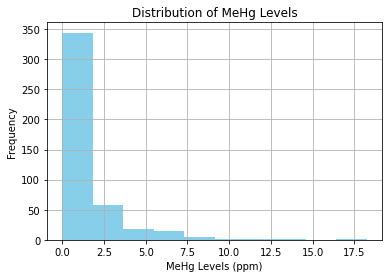

In [22]:
## CHECKING NORMALITY WITH HISTOGRAM

mercury['MeHg'].hist(color = "skyblue")
plt.title("Distribution of MeHg Levels")
plt.xlabel("MeHg Levels (ppm)")
plt.ylabel("Frequency")
plt.show()

As the hisogram shows, the distribution is right skewed in terms of the MeHg levels in the fish.

In [13]:
mercury['Species'].unique() # checking how many categories

array(['amberjack', 'almaco jack', 'pinfish', 'king snake eel',
       'moray eel', 'cutthroat eel', 'rock sea bass',
       'vermillion snapper', 'longspine porgy', 'red snapper',
       'snowy grouper', 'gag grouper', 'red porgy', 'cubbyu',
       'bank sea bass', 'warsaw grouper', 'yellow-edge grouper',
       'grey snapper', 'scamp', 'grey triggerfish', 'whitebone porgy',
       'inshore lizard fish', 'hermit crab', 'tomtate', 'black sea bass',
       'shrimp'], dtype=object)

In [14]:
statistic, p_value = stats.kruskal(*[group['MeHg'].values for name,group in mercury.groupby('Species')])
            
print("Kruskal-Wallis H-Test to see if population median of different fish species MeHg levels are equal:\n")
print("Test Statistic: " + str(statistic) + ", P-Value: " + str(p_value) + ", P-Value < 0.05?: " + str(p_value < .05))
if p_value < 0.05:
    print("Since the pvalue is less than 0.05, we reject the null hypothesis. \n")
else:
    print("Since the pvalue is greater than 0.05, we accept the null hypothesis.\n")

Kruskal-Wallis H-Test to see if population median of different fish species MeHg levels are equal:

Test Statistic: 314.11251605420625, P-Value: 8.760673203817362e-52, P-Value < 0.05?: True
Since the pvalue is less than 0.05, we reject the null hypothesis. 



Based on the results of the Kruskal test, since the p-value < alpha of 0.05, we reject the null hypothesis that the population medians of all of the fish species are the same.  There is sufficient evidence to suggest that the median MeHg levels are different.  This means that as a result of increased methlymercury in the ocean, some fish species were more susceptible to picking it up than others.  Let's see which species picked up the most, and which species are over the mercury level standard given by the FDA, which is 1ppm:

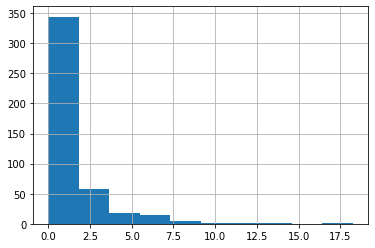

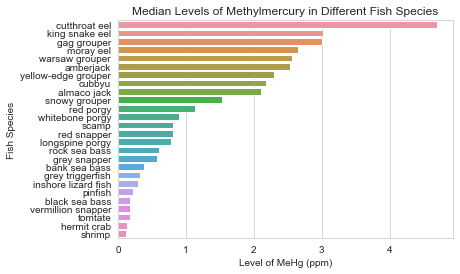

In [195]:
medianMercury = mercury.groupby('Species').agg({'MeHg':'median'}).reset_index().sort_values('MeHg',ascending = False)
#medianMercury.sort_values("MeHg")
#mercury.sort_values(by=['MeHg'],ascending=True,inplace=True)
sns.set_style("whitegrid")
sns.barplot(data=medianMercury,x="MeHg",estimator=np.median,y='Species',orient='h',ci=None)
#medianMercury.plot.bar(rot=0)
plt.title("Median Levels of Methylmercury in Different Fish Species")
plt.xlabel("Level of MeHg (ppm)")
plt.ylabel("Fish Species")
plt.show()